In [17]:
#IMPORTS 
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")
#sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")

import forces as fc
import molecules as mc
import img3dto2d as i32
import util
#import random
#import copy
#from tqdm import tqdm

#mayavi imports:
from __future__ import absolute_import, division, print_function
from mayavi import mlab
import math

#stats:
import stats as st
from tqdm import tqdm

#video imports 
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\videoStuff")
import video_format as vf
from skimage.transform import resize, rescale
from skimage.morphology import label

In [9]:
#13% 8k - simV3R_500_8000_1416_9_1000_8c033.npy
#13% 5k - simV3R_1000_5000_1413_3_1000_bb994.npy
#6% 8k - simV3R_1000_8000_1415_9_1000_8a26c.npy

In [18]:
# load radius and all molecule positions
filename = "simV3R_1000_8000_1417_9_1000_51b69.npy"#"simV3R_500_8000_1416_9_1000_8c033.npy"#"simV3R_1000_4000_214142_5_1000_dc035.npy"#"simV3R_500_4000_1414_5_1000_802c4.npy" #"simV3R_100_3000_1414_5_1000_8c01e.npy" #"simV3R_500_2000_1414_5_1000_d48e0.npy"#"simV3R_20_8000_1414_5_1000_ab233.npy"#"simV3R_500_3952_1416_5_1000_b3409.npy"
filename_split = filename.split("_")
#points, radii= old_load(filename)
points, radii, acc = mc.load_molecule_steps(filename)

#sim values:
num_frames = int(filename_split[1]) #can be stored at eg. 100 steps pr frame (to save space)
num_molecules = len(points[0])
size_const = int(filename_split[2])
seed = int(filename_split[3])
max_stepsize =  int(filename_split[4])
skip_frames = int(filename_split[5])
box_size = np.array([size_const,size_const,1000]) #may need to set the z value to differently

#image values
image_size = np.array([size_const,size_const])
sigma_scale = 1.5 #gauss values for individual circles
sigma_smooth = 175 #gauss smoothing

frames = [0,len(points) - 1] #select frames to plot
print("total frames", num_frames * skip_frames, "stored frames:" , num_frames, "molecules:",  num_molecules ," image size:", image_size , "seed:",seed, "max stepsize:",max_stepsize)
print("acc mean:", np.mean(acc))

total frames 1000000 stored frames: 1000 molecules: 479  image size: [8000 8000] seed: 1417 max stepsize: 9
acc mean: 0.375109


In [11]:
skip_stats = 25 #50 - 2mil
frame_nums = [x for x in range(0,num_frames,skip_stats)]
frame_nums_text = [x*skip_frames for x in range(0,num_frames,skip_stats)]
points_skiped = [points[x] for x in frame_nums]

In [12]:
print(len(points_skiped))

20


In [13]:
energies = []
for frame in tqdm(points_skiped):
    cum = 0
    #ctr = 0
    for i in range(len(frame)):
        pos1 = frame[i]
        rad1 = radii[i]
        m1 = mc.Molecule(pos1,rad1)


        for j in range(i+1,len(frame)):
            pos2 = frame[j]
            rad2 = radii[j]
            m2 = mc.Molecule(pos2,rad2)

            cum += fc.total_force_molecule(m1,m2,threshold=0.0)
            #current_dist = np.linalg.norm(mol2-mol1) - rad1 - rad2
            #cum += current_dist
            #ctr += 1
    #print(ctr,((len(frame)) * (len(frame)-1))/2)
    energies.append(cum)
    #avg = cum / (((len(frame)) * (len(frame)-1))/2) #(N*(N-1)/2)
    #dist.append(avg)

100%|██████████| 20/20 [02:00<00:00,  6.02s/it]


62933603.226572335 7933.070227003687


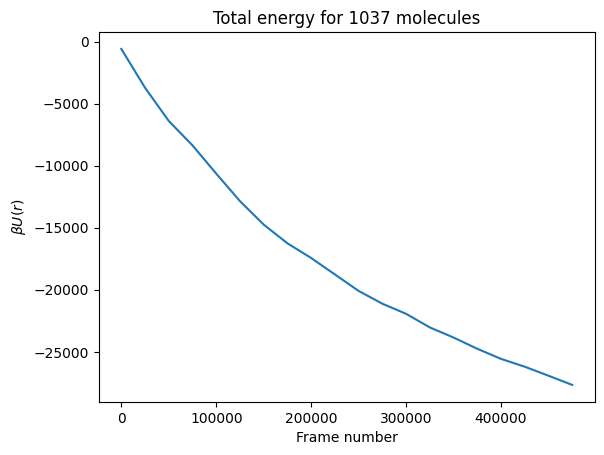

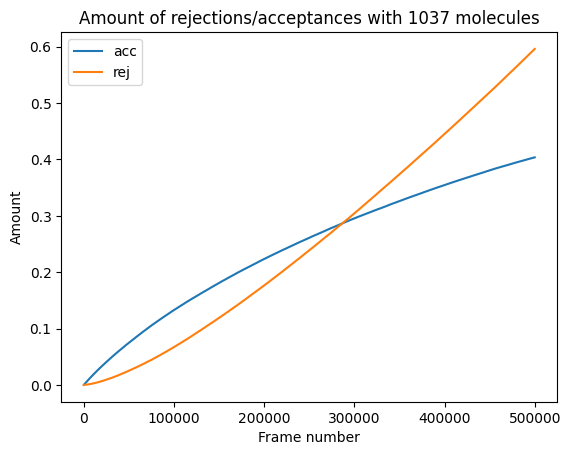

In [14]:
#plot total energy
print(np.var(energies),np.std(energies))
plt.plot(frame_nums_text,energies)
plt.title(f"Total energy for {num_molecules} molecules")
plt.xlabel("Frame number")
plt.ylabel(r"$\beta U(r)$")
plt.show()

acceptances, rejections = st.mc_rate(acc)

#plot acceptance and rejectance 
plt.plot(acceptances,label="acc")
plt.plot(rejections,label="rej")
plt.title(f"Amount of rejections/acceptances with {num_molecules} molecules")
plt.xlabel("Frame number")
plt.ylabel("Amount")
plt.legend()
plt.show()